In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] =df["job_skills"].apply(lambda x :ast.literal_eval(x) if pd.notna(x) else x)

# What are the most demanded skills for the top 3 most popular Data roles

In [13]:
# calculating skill count based on job_title_short column
df_US = df[(df["job_country"] == "United States")]
df_US_exploded = df_US.explode("job_skills")
df_skill_count = df_US_exploded.groupby(["job_skills","job_title_short"]).size().reset_index(name="skill_count").sort_values(by="skill_count",ascending=False)
df_skill_count


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


# calculating top 3 jobs

In [14]:
job_titles = df_skill_count["job_title_short"].unique().tolist()
top_3_jobs = job_titles[:3]

In [15]:
df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name="total_jobs")

In [16]:
df_skill_percent = pd.merge(df_skill_count,df_job_title_count, how = "left", on = "job_title_short")

In [17]:
df_skill_percent["skill_percent"] = 100 * df_skill_percent["skill_count"]/df_skill_percent["total_jobs"]
df_skill_percent

,job_skills,job_title_short,skill_count,total_jobs,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


# Visualization

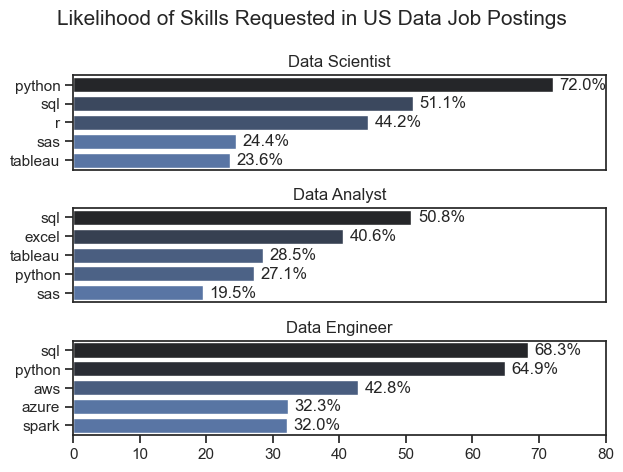

In [18]:
fig, ax = plt.subplots(len(top_3_jobs),1)

for i,job in enumerate(top_3_jobs):
    df_plot = df_skill_percent[df_skill_percent["job_title_short"]==job].head(5)
    #df_plot.plot(kind="barh", x= "job_skills", y= "skill_percent",ax = ax[i],title = job)
    sns.set_theme(style="ticks")
    sns.barplot(data=df_plot,x = "skill_percent", y="job_skills",ax=ax[i],hue="skill_percent",palette="dark:b_r")
    ax[i].set_title(job)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,80)
    ax[i].legend().set_visible(False)

    for n,v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v+1,n,f"{v:.1f}%", va = "center")
    if i != len(top_3_jobs)-1:
        ax[i].set_xticks([]) # removing xticks on ax[0] and ax[1]
fig.suptitle("Likelihood of Skills Requested in US Data Job Postings", fontsize = 15)
fig.tight_layout()